# Homework 6 (30 marks)
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW6_ZHANG_DAIXI.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission.

NOTE: Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 04/09/2021 (Friday).

Please ensure you follow all the steps mentioned in the homework.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below -

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name'))

Import all the libraries you require in the cell below.



In [127]:
# Enter your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import tree

### 1. Build a classification model that predicts the edibility of mushrooms (class variable in the dataset). You have been provide with a dataset as a mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy (8 marks)

A. Read the dataset, explore it and determine what is the dependent variable (1 mark)

B. Store the feature and target variable. (2 marks)

C. Convert all categorical variables into dummy variables (1 mark)

D. Partition the data into training and test sets (70/30) (1 mark)

E. Fit the training data to a classification tree. (3 marks)

In [128]:
# Enter your code here
pd.set_option('display.max_columns',None)
mushroom = pd.read_csv("/content/sample_data/mushrooms.csv")
print(mushroom.head(15))

# The independent variable is the Class, while all else are the dependent variable

   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      p         x           s         n       t    p               f   
1      e         x           s         y       t    a               f   
2      e         b           s         w       t    l               f   
3      p         x           y         w       t    p               f   
4      e         x           s         g       f    n               f   
5      e         x           y         y       t    a               f   
6      e         b           s         w       t    a               f   
7      e         b           y         w       t    l               f   
8      p         x           y         w       t    p               f   
9      e         b           s         y       t    a               f   
10     e         x           y         y       t    l               f   
11     e         x           y         y       t    a               f   
12     e         b           s         y       t   

In [129]:
#feature_cols=['cap-shape','cap-surface','cap-color','odor','gill-attachment',"gill-spacing", "gill-size", "gill-color" ,"stalk-shape" ,"stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring" ,"stalk-color-above-ring" ,"stalk-color-below-ring", "veil-type" ,"veil-color" ,"ring-number" ,"ring-type" ,"spore-print-color", "population" ,"habitat"]
feature_cols=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring','stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']

x=mushroom[feature_cols]
y=mushroom['class']

In [130]:
x = pd.get_dummies(x)
y = pd.get_dummies(y)
y = y["e"]

In [131]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 2020, stratify=y)

In [132]:
classify_model = DecisionTreeClassifier(max_depth=6, criterion="entropy", random_state=2020).fit(xTrain,yTrain)

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics (3 marks)



[[1175    0]
 [   0 1263]]


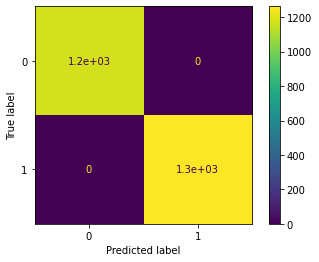

In [133]:
# Enter your code here
ypred = classify_model.predict((xTest))

cnf_matrix = metrics.confusion_matrix(yTest,ypred)
print(cnf_matrix)

metrics.plot_confusion_matrix(classify_model,xTest, yTest)

3. Print the accuracy on the training partition?  (2 marks)


In [134]:
# Enter your code here
training_pred =classify_model.predict(xTrain)
acc_training = accuracy_score(training_pred, yTrain)
print("Accuracy on Training partition:",acc_training)


Accuracy on Training partition: 1.0


4. Print the accuracy on the test partition? (2 marks)


In [135]:
# Enter your code here
acc_training = accuracy_score(yTest, ypred)
print("The Accuracy of Test partition:",acc_training)

The Accuracy of Test partition: 1.0


5. Show the classification tree and save it (5 marks)


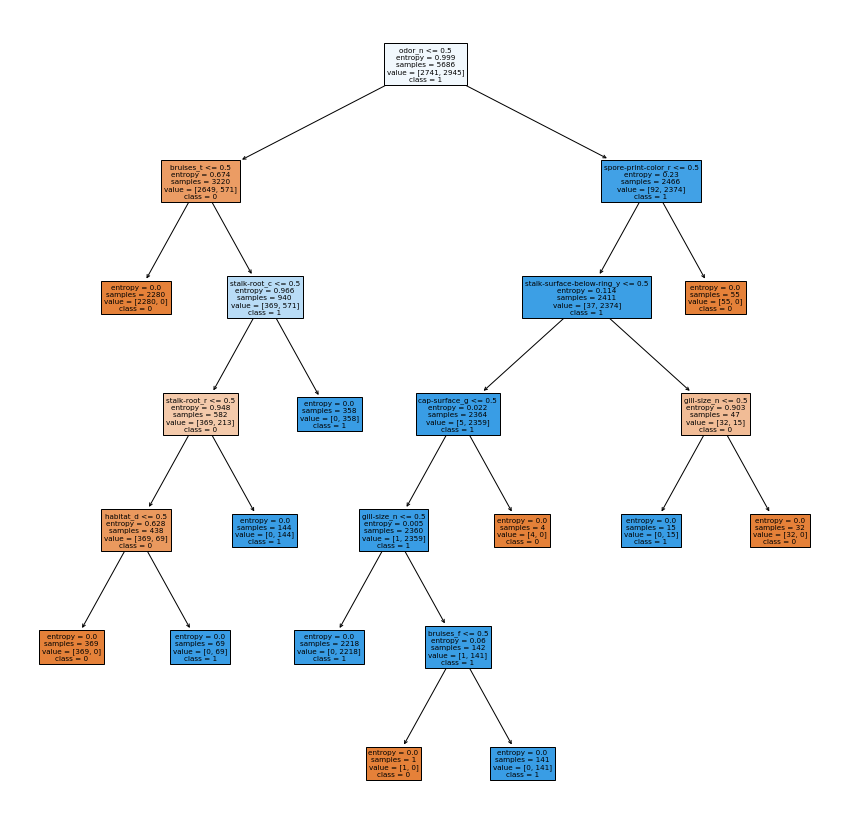

In [136]:
# Enter your code here
fn = x.columns
plt.figure(figsize=(15,15))
classList = list(map(str,classify_model.classes_.tolist()))
a = tree.plot_tree(classify_model, feature_names=fn, class_names=classList, filled=True)
plt.show()

6. Find and print the top three most important features in your decision tree for determining toxicity. (4 marks)

In [137]:
# Enter your code here
#print('Feature Importance:', classify_model.feature_importances_)
imp =pd.DataFrame(zip(xTrain.columns, classify_model.feature_importances_))
imp = imp.sort_values(by = 1, ascending =False)
#print(imp)
#print(imp)
print("The top three most important features are:",list(imp.iloc[:3,:][0]))


The top three most important features are: ['odor_n', 'bruises_t', 'stalk-root_c']


7. Classify the following mushroom. (6 marks)

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [138]:
def input_creator(input):
  diction = {}
  for con in xTrain.columns:
    if con in input:
      diction[con] = [1]
    else:
      diction[con] = [0]
  return pd.DataFrame(diction)

In [139]:
# Enter your code here

conditions = ['cap-shape_x', 'cap-surface_s', 'cap-color_n', 'bruises_t', 'odor_y', 'gill-attachment_f', 'gill-spacing_c', 'gill-size_n', 'gill-color_k', 'stalk-shape_e', 'stalk-root_e', 'stalk-surface-above-ring_s', 'stalk-surface-below-ring_s', 'stalk-color-above-ring_w', 'stalk-color-below-ring_w', 'veil-type_p', 'veil-color_w', 'ring-number_o', 'ring-type_p', 'spore-print-color_r', 'population_s', 'habitat_u']
input = input_creator(conditions)

print("Predicition [1:edible; 0:Poison]:", classify_model.predict(input))
if classify_model.predict(input)[0] == 0:
  print("The Mushroom have Poison, Be Careful!")
else:
  print("The Mushroom is edible, No Warries!")

Predicition [1:edible; 0:Poison]: [0]
The Mushroom have Poison, Be Careful!
